# Retención, una aproximación

¡Hola! Este código fue creado por [Silvia Gutiérrez](https://meta.wikimedia.org/wiki/User:SEgt-WMF) con aportes de <a href="https://meta.wikimedia.org/wiki/User:KCVelaga_(WMF)">Krishna Chaitanya (KC) Velaga</a> para responder la pregunta específica: Un grupo de personas voluntarias querían saber, utilizando los datos del Dashboard, quién y cuántas personas seguían editando después de haber sido capacitadas.
Ya que esta ha sido una pregunta común, se comparte con todos ustedes para seguir reflexionando sobre estos datos :)

## Paso previo: Obtener los datos
Haga clic derecho en el enlace "Editar datos" y copie la URL

<p float="left">
  <img src="https://public-paws.wmcloud.org/User:SEgt-WMF/editor_retention/img/step_1.png"  width="30%" height="30%">
  <img src="https://public-paws.wmcloud.org/User:SEgt-WMF/editor_retention/img/descarga_datos.png"  width="50%" height="50%">
</p>

### 1) Importar funciones
Estas "funciones" son el código que escribí para facilitar el análisis y sólo hace falta que las "actives". ¡Aunque claro que puedes modificarlas está abierto a ser modificado! Estas funciones viven en el archivo "my_functions.py". Para activarlas, simplemente haz clic en la siguiente celda y presiona Ctrl+Enter o haz clic en el botón de "play" en la parte superior de esta página (más información en este [video](https://www.youtube.com/watch?v=2V5Gq_iYqsY).
Harás lo mismo con todas las siguientes celdas y verás este emoji 🤓 en cualquier paso en el que se requiera información

In [1]:
from datetime import date
from my_functions import decode_df, connect, pd_query, get_wikis, query_wikis, sql_tuple, create_dataframe, generate_query, plot_edits_over_time, generate_timeline_query, plot_indivedits_over_time

### 2) Importa tus datos 🤓
Sustituye la URL a continuación con tu propio csv (el que copiaste y pegaste en el paso de preparación)

In [2]:
df = create_dataframe("https://outreachdashboard.wmflabs.org/course_edits_csv?course=Biblioteca_Daniel_Cos%C3%ADo_Villegas_ColMex/Editat%C3%B3n_Haciendo_y_deshaciendo_el_g%C3%A9nero")
df.head()

revision_id                 timestamp                      wiki  \
0    106085145 2018-03-08 20:58:25+00:00  https://es.wikipedia.org   
1    106085474 2018-03-08 21:11:52+00:00  https://es.wikipedia.org   
2    106085499 2018-03-08 21:13:01+00:00  https://es.wikipedia.org   
3    106085534 2018-03-08 21:13:56+00:00  https://es.wikipedia.org   
4    106085608 2018-03-08 21:16:04+00:00  https://es.wikipedia.org   

                   article_title  \
0  Rosa María Fernández Esquivel   
1  Rosa María Fernández Esquivel   
2  Rosa María Fernández Esquivel   
3  Rosa María Fernández Esquivel   
4  Rosa María Fernández Esquivel   

                                                diff     username  \
0  https://es.wikipedia.org/w/index.php?title=Ros...  Silva Selva   
1  https://es.wikipedia.org/w/index.php?title=Ros...  Silva Selva   
2  https://es.wikipedia.org/w/index.php?title=Ros...  Silva Selva   
3  https://es.wikipedia.org/w/index.php?title=Ros...  Silva Selva   
4  https://es.wikipedia.org/w/index.php?title=Ros...  Silva Selva   

   bytes_added  references_added  new_article  dashboard_edit  \
0           14               0.0        False           False   
1           -2               0.0        False           False   
2           44               0.0        False           False   
3           30               0.0        False           False   
4           42               0.0        False           False   

        domain_name database_code  
0  es.wikipedia.org        eswiki  
1  es.wikipedia.org        eswiki  
2  es.wikipedia.org        eswiki  
3  es.wikipedia.org        eswiki  
4  es.wikipedia.org        eswiki

### 3) Crea la consulta 🤓
El siguiente código crea la consulta que necesita para averiguar quién, de todos los usuarios que entrenó, siguió editando después. Para eso, debe decidir dos intervalos de tiempo: 1) cuántos días antes de su evento podrían haberse registrado ("days_before = 60" significa que se registraron dentro de los 60 días anteriores al evento) y 2) cuántos días después del evento rastreará su actividad, es decir, "days_after=360" significa 360 días después del último día del evento (tenga en cuenta que podría romper el código si agrega demasiados días)

In [3]:
query = generate_query(df, days_before = 60, days_after = 360) #second number is the number of days before the start of the edition that should be considered
print(query)

I'm looking for edits between 20180308183740 & 20190304005637
I have consider any users who edited in the campaign and created a Wiki-account between 20180107183740 & 20180308183740

    WITH reg_users AS 
        (SELECT
            user_registration,
            user_editcount,
            user_name    
        FROM
            user
        WHERE
            user_name IN ('Silva Selva', 'PetrohsW', 'Fagoaga', 'Ninonllano', 'Danfermat2014', 'Clemenflays', 'Clauroinfante', 'Cutzin', 'Ikiwiki1984', 'Edo21c', 'ClaudiaOcA', 'Lizperez.c', 'Vjcid', 'Marisol Frías', 'Taniastronauta', 'Plathando', 'Xochipiltecatl', 'Mromandl', 'Rurudesu', 'Cliografo', 'Torres mejia', 'Diaz campos', 'Radugako', 'Nenenki', 'Valentín Or', 'MonSH', 'Marianacordoban', 'Sarcle', 'Akatoxkatl', 'Tbocanegra', 'Antropfem') AND
            user_registration BETWEEN 20180107183740 AND 20180308183740),
        revision AS (
            SELECT
            COUNT(rev_id),
            actor_name
            FROM
            r

### 4) Revisa qué wikis recibieron capacitación y decide cuál examinar

In [4]:
wikis = get_wikis(df)
print(wikis)

['eswiki', 'wikidatawiki']


### 5) Cambia "eswiki" con el código del wiki que te interesa examinar 🤓

In [5]:
edits_user_and_project = query_wikis(query, df, selected_wiki = "eswiki")

I'm done with eswiki


### 6) Verifica tus resultados
Si hubo personas que a) se unieron en el lapso de tiempo que definiste y b) continuaron editando en el lapso de tiempo que también definiste, aparecerán debajo, si no, significa que nadie cumple con estas dos condiciones

In [6]:
edits_user_and_project

COUNT(rev_id)       actor_name wiki_db
0              1    Clauroinfante  eswiki
1             19           Cutzin  eswiki
2              6    Danfermat2014  eswiki
3              6  Marianacordoban  eswiki
4             20          Nenenki  eswiki
5              8       Ninonllano  eswiki
6              3         Rurudesu  eswiki
7             13            Vjcid  eswiki
8              1   Xochipiltecatl  eswiki

### 7) ¡Empieza el análisis!
El siguiente bloque de código te mostrará las y los editores por orden de actividad, es decir, por el número de ediciones que siguieron haciendo en la Wiki que seleccionaste en el paso 5

In [7]:
# Count the total number of edits per 'actor_name'
sum_counts = edits_user_and_project.groupby('actor_name')['COUNT(rev_id)'].sum().reset_index()
sorted_counts = sum_counts.sort_values(by='COUNT(rev_id)', ascending=False)
sorted_counts

actor_name  COUNT(rev_id)
4          Nenenki             20
1           Cutzin             19
7            Vjcid             13
5       Ninonllano              8
2    Danfermat2014              6
3  Marianacordoban              6
6         Rurudesu              3
0    Clauroinfante              1
8   Xochipiltecatl              1

### 8) Obtén ediciones en el tiempo 🤓
El siguiente código crea la consulta que necesitas para averiguar la línea de tiempo de las ediciones de tus editoras y editores retenidos. Ten en cuenta que debes (nuevamente, como en el paso 3) debes seleccionar la ventana de tiempo de cuántos días antes de tu evento pudieron haberse registrado y cuántos días después del evento deseas realizar un seguimiento

In [8]:
query_time = generate_timeline_query(df, days_before = 60, days_after = 300)
print(query_time)

The registration date I used was between 20180107183740 & 2018-03-08 18:37:40+00:00

    WITH reg_users AS 
        (SELECT
            user_registration,
            user_editcount,
            user_name    
        FROM
            user
        WHERE
            user_name IN ('Silva Selva', 'PetrohsW', 'Fagoaga', 'Ninonllano', 'Danfermat2014', 'Clemenflays', 'Clauroinfante', 'Cutzin', 'Ikiwiki1984', 'Edo21c', 'ClaudiaOcA', 'Lizperez.c', 'Vjcid', 'Marisol Frías', 'Taniastronauta', 'Plathando', 'Xochipiltecatl', 'Mromandl', 'Rurudesu', 'Cliografo', 'Torres mejia', 'Diaz campos', 'Radugako', 'Nenenki', 'Valentín Or', 'MonSH', 'Marianacordoban', 'Sarcle', 'Akatoxkatl', 'Tbocanegra', 'Antropfem') AND
            DATE(user_registration) BETWEEN 20180107183740 AND 20180308183740),
        revision AS (
            SELECT
            rev_id,
            rev_timestamp,
            actor_name
            FROM
            revision
            JOIN actor ON rev_actor = actor_id
            JOIN 

### 9) Ejecuta la consulta
Si todo salió bien, verá un marco de datos con los siguientes nombres de columna: rev_id, rev_timestamp (la fecha de la edición), actor_name (el nombre de usuaria/o) y wiki_db (la wiki en la que hicieron la edición).

In [9]:
result = query_wikis(query_time, df, selected_wiki = "eswiki")
result.head()

I'm done with eswiki


### 10) ¡Grafica tus resultados! 🤓
#### 10.1) Ediciones de editores/as retenidas en el tiempo 🤓
Este código mostrará un gráfico de todas las ediciones de sus usuarias/os retenidos en el tiempo. Solo mostrará las fechas de las ediciones que están por encima del umbral que selecciones en "edit_counts_threshold". También puedes cambiar el tamaño de fuente de esas fechas, es decir, "fontsize = 8" establece que la fuente es tamaño ocho :)

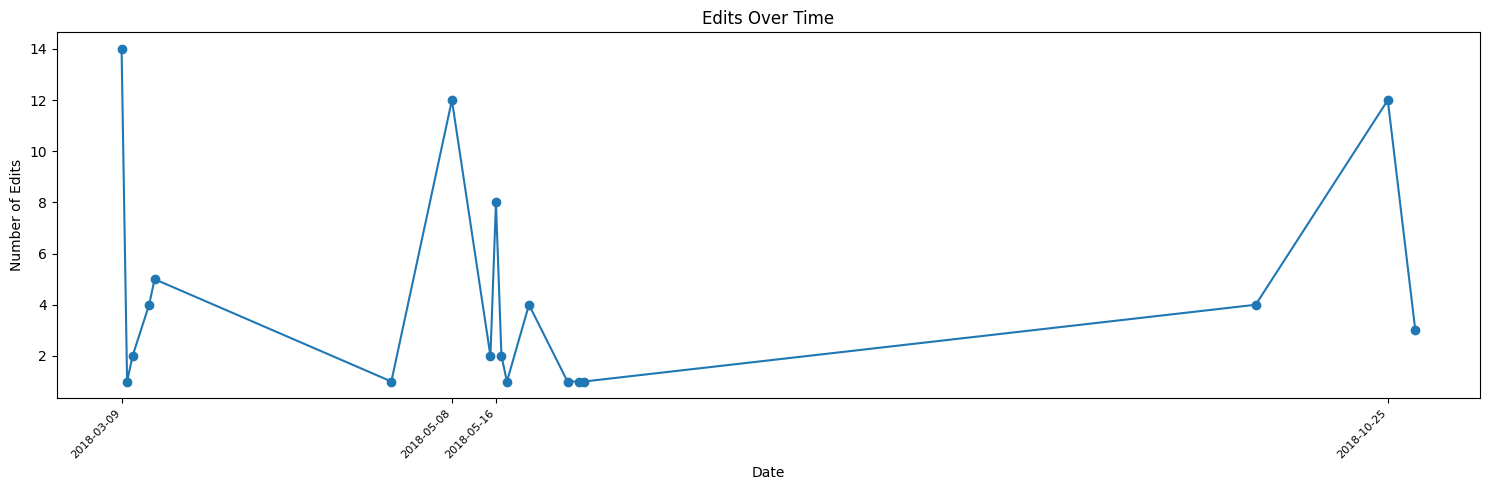

In [11]:
plot_edits_over_time(result, edit_counts_threshold = 5, fontsize = 8)

#### 10.1) Ediciones individuales de editoras/es retenidas en el tiempo 🤓
Esto es bastante parecido al último gráfico, solo que incluirá editoras/es que hayan hecho más ediciones según el umbral que definas (edit_counts_threshold = 3, significa que veremos sólo editorxs que hayan hecho más de tres ediciones). Sólo se mostrarán las fechas de los días en que haya más ediciones de las definidas en el "daily_edits_threshold"

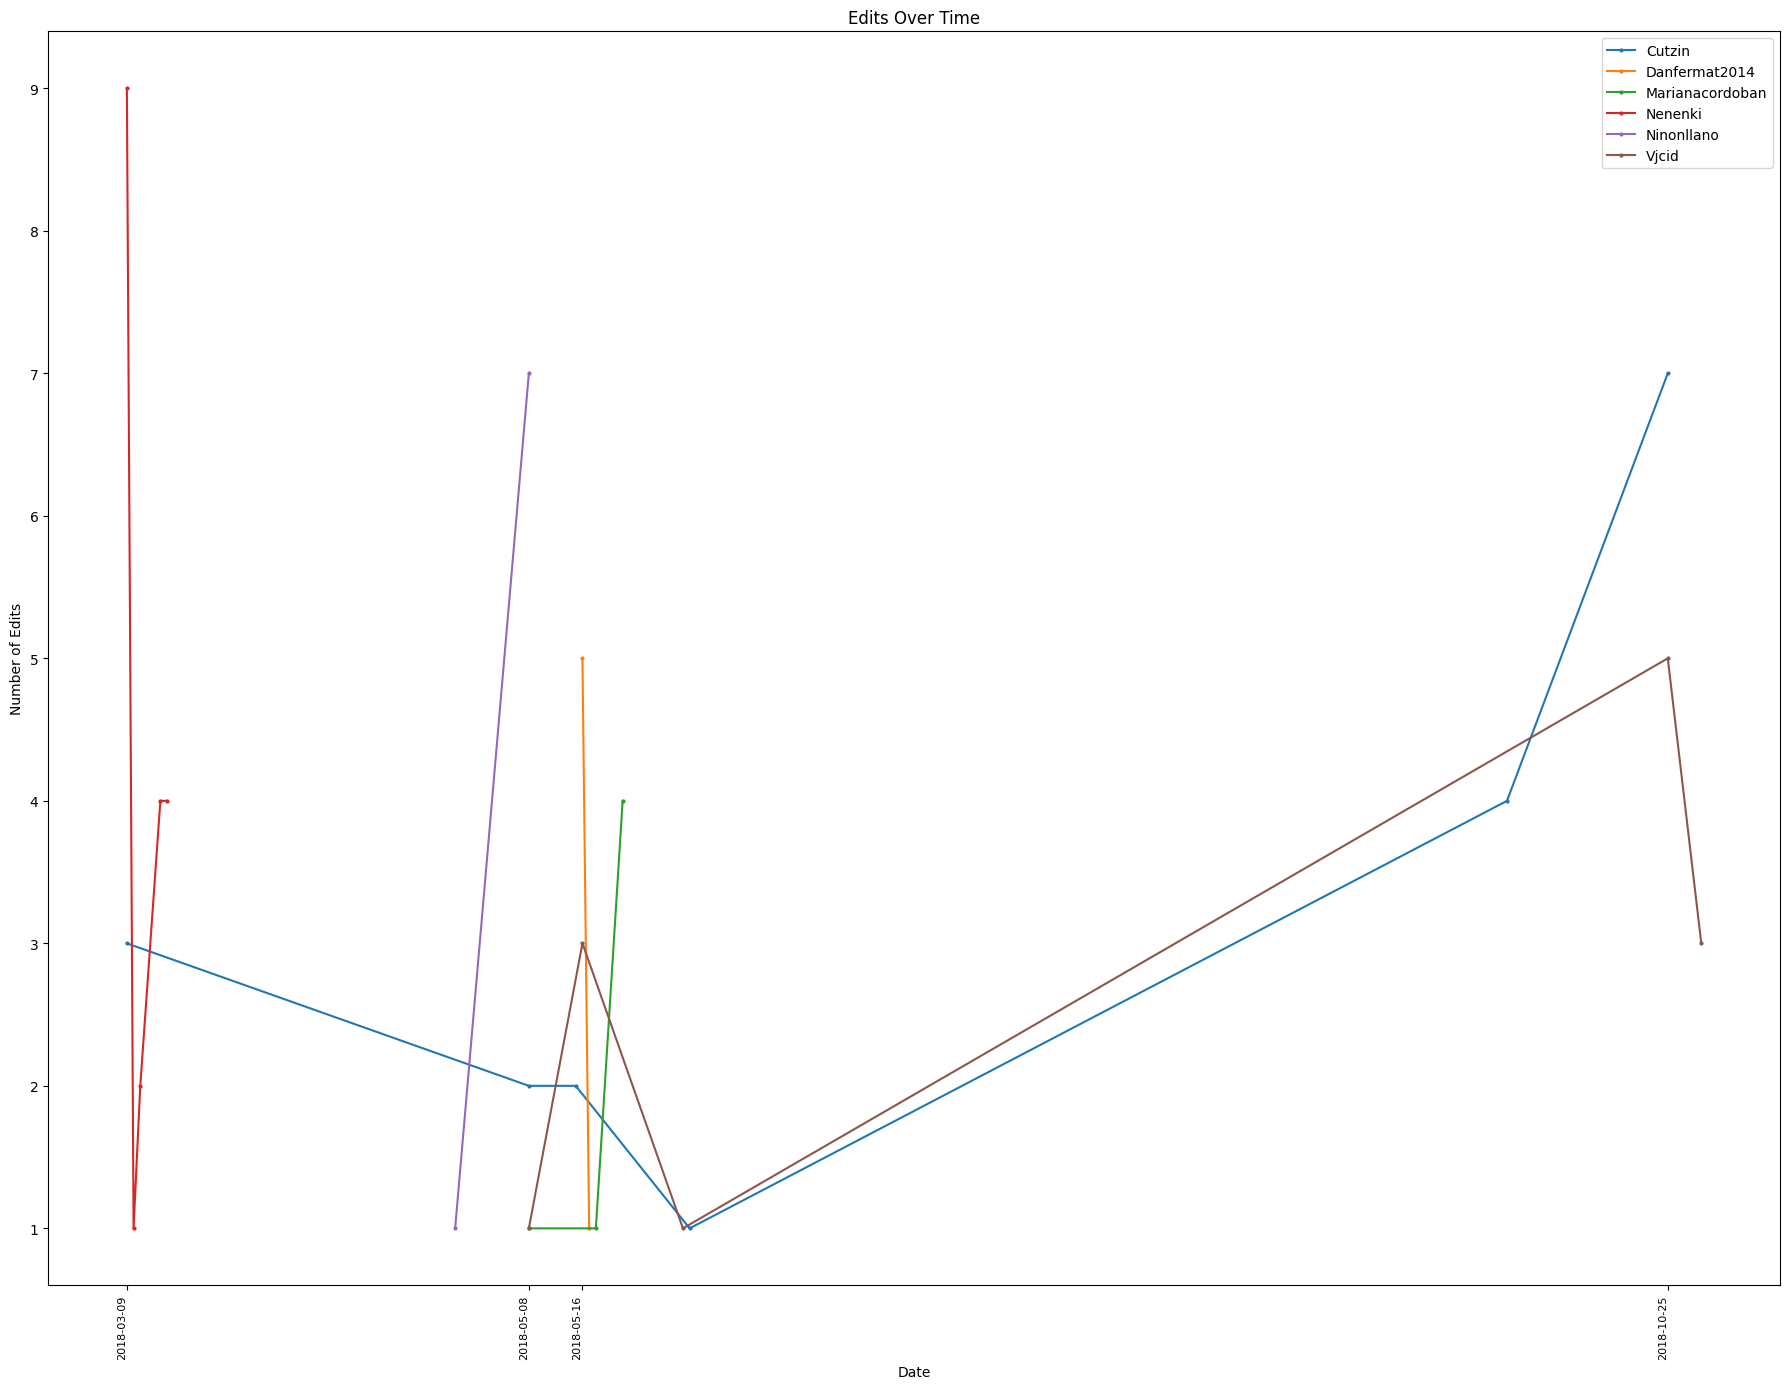

<Figure size 640x480 with 0 Axes>

In [13]:
plot_indivedits_over_time(result, edit_counts_threshold = 3, daily_edits_threshold = 1)

# Export your results to a csv

In [ ]:
result.to_csv('result_set_timestamp.csv')